# ChessY
https://github.com/mrudolphlilith/ChessY

## Graph Structure
* Positions $P$
    * metadata (turn, en passant, castle, etc.)
    * list of squares $\{i, p\}$, $i$ is a square and $p$ is a piece (color and type) on that square
* Nodes $N$
    * list of node states $s$, $s=[-1,0,1]$ for white, unoccupied, and black, respectively
* Edges $E$
    * list of triples $\{i_{source}, i_{target}, s\}$ (why is state needed?)
## Graph Generation
* `getNodesFromPosition`: one of $[-1,0,1]$ for 64 squares
* `getEdgesFromPosition`: all possible moves, weighted by ___
## Analysis
* `getNumberOfNodes(N)`, `getNumberOfEdges(E)`: filter for types, color, state
* `getAdjacencyMatrix(E)`: Adjaceny matrix from edges
* `getConnectedness(E)`: the ratio between the number of edges E and the number of edges in a fully connected graph with the same number of nodes
* `getControl(N,E)`: fraction of unique unoccupied nodes and nodes occupied by the opponent targeted by nodes in a given state
* `getMobility(N,E)`: fraction of unique unoccupied nodes targeted by nodes in a given state
* `getDominance(N,E)`: fraction of unique unoccupied nodes, source nodes in a given state and target nodes occupied by the opponent
* `getAverageNodeReach(N,E)`: number of unique nodes targeted by edges emanating from nodes in a given state, normalized by the total number of nodes in that state
* `getOffensiveness(N,E)`: number of nodes in a given state which target occu- pied nodes in the opposite state
* `getDefensiveness(N,P)`: number of nodes in a given state which yield potential edges to nodes in the same state
## Functionality
### $i$ and $j$, source and target??? turn???
* Adjaceny matrix: Legal moves from $i$ to $j$ by color $s_i$ builds $A_{ij}=s_i$
* Capturing: $s_j=-s_i$, except for en passant
* Castling: Two pairs of nodes $s_{i1}=s_{i2},\ s_{j1}=s_{j2}=0$
* En passant & non-capturing moves: $s_j=0$ (should be $s_i=0$?)
* Castling and en passant requires extra info from $P$
* Check: if an edge target is a king, then there must be another edge that removes the checking edge
* Checkmate: no other edge(s) that remove the checking edge


In [1]:
import chessdb
import chess
import chess.svg

In [2]:
df = chessdb.parse()
game = chessdb.get_game(df.iloc[0])

In [3]:
def get_edges(b: chess.Board):
    moves = [(m.from_square, m.to_square, b.turn) for m in list(b.legal_moves)]
    b.push(chess.Move.null()) # pass turn
    moves += [(m.from_square, m.to_square, b.turn) for m in list(b.legal_moves)]
    b.pop() # undo pass turn
    return moves

In [31]:
#TODO: make arrows skinnier
# chess.svg.SvgWrapper(a.replace('stroke-width="9', 'stroke-width="2'))
edges = get_edges(game.board())
chess.svg.board(game.board(),
    arrows=[chess.svg.Arrow(edge[0], edge[1], color='green' if edge[2] else 'blue') for edge in edges])
pass

In [6]:
def get_nodes(b: chess.Board, out_map=[1, 0, -1]):
    in_map = [chess.WHITE, None, chess.BLACK]
    code = dict(zip(in_map, out_map))
    return [code.get(b.color_at(sq)) for sq in chess.SQUARES]

In [7]:
# could use this for both get_nodes and get_position
# game.board().piece_map()

In [8]:
import networkx as nx

In [9]:
# nodes = {0:'A', 1:'B', 2:'C'}
# G = nx.Graph()
# G.add_nodes_from(range(3))
# nx.draw(G, with_labels=True,
#     linewidths=4,
#     node_color=['white', 'black', 'gray'],
#     edgecolors=['r', 'g', 'b'],
#     font_color=['black', 'white', 'black'],
# )

## `chess.Board` to `networkx.DiGraph`

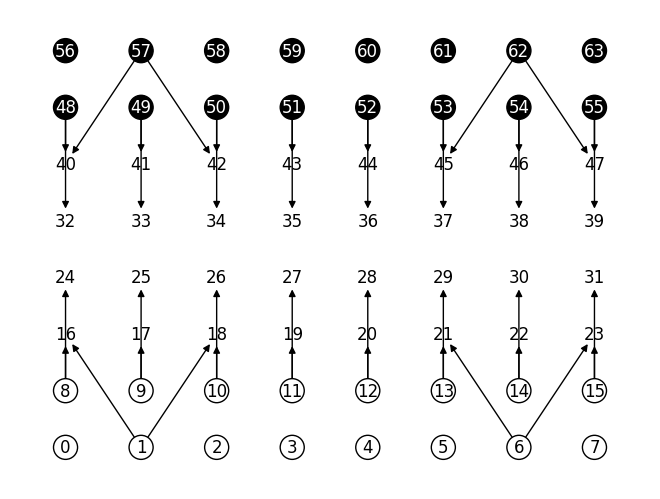

In [30]:
G = nx.DiGraph()
G.add_nodes_from(range(64))
G.add_edges_from([edge[:2] for edge in edges])
node_colors = get_nodes(game.board(), out_map=['white', 'none', 'black'])
edge_colors = get_nodes(game.board(), out_map=['black', 'none', 'black'])
font_colors = get_nodes(game.board(), out_map=['black', 'black', 'white'])

# Replace networkx.drawing.nx_pylab:L1028 with
# color=font_color if isinstance(font_color, str) else font_color[n],
nx.draw(G, {i: divmod(i, 8)[::-1] for i in range(64)}, with_labels=True, node_color=node_colors, font_color=font_colors, edgecolors=edge_colors)

In [34]:
#adj matrix
nx.adjacency_matrix(G)

(64, 64)